In [1]:
import pybamm
import numpy as np 
import matplotlib.pyplot as plt
import pickle
from joblib import Parallel, delayed
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

from IPython.display import Audio
url = "https://proxy.notificationsounds.com/wake-up-tones/you-have-new-message-484/download/file-a1_ascendent-64kbps.mp3"
notify=Audio(url = url, autoplay = True)

########## pickle commands for dumping and retrieving data #######
# filename = 'dogs'
# outfile = open(filename,'wb')
# pickle.dump(dogs_dict,outfile)
# outfile.close()
# infile = open(filename,'rb')
# data = pickle.load(infile)
# infile.close()

########### parallel computations command ####################
# data = Parallel(n_jobs=-1)(delayed(my_function)(i) for i in my_iterable)

In [2]:
model = pybamm.lithium_sulfur.MarinescuEtAl2016()
current = .36/5
hours = 50
time_in_seconds = 10#12878#hours*3600
# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
    }
)
params.process_model(model)
sim1 = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
        #root_method = 'lm',
        #root_tol = 1e-7, 
        #dt_max = 1e-7
    ),
)
sim1.solve(np.linspace(0, time_in_seconds, 10000))

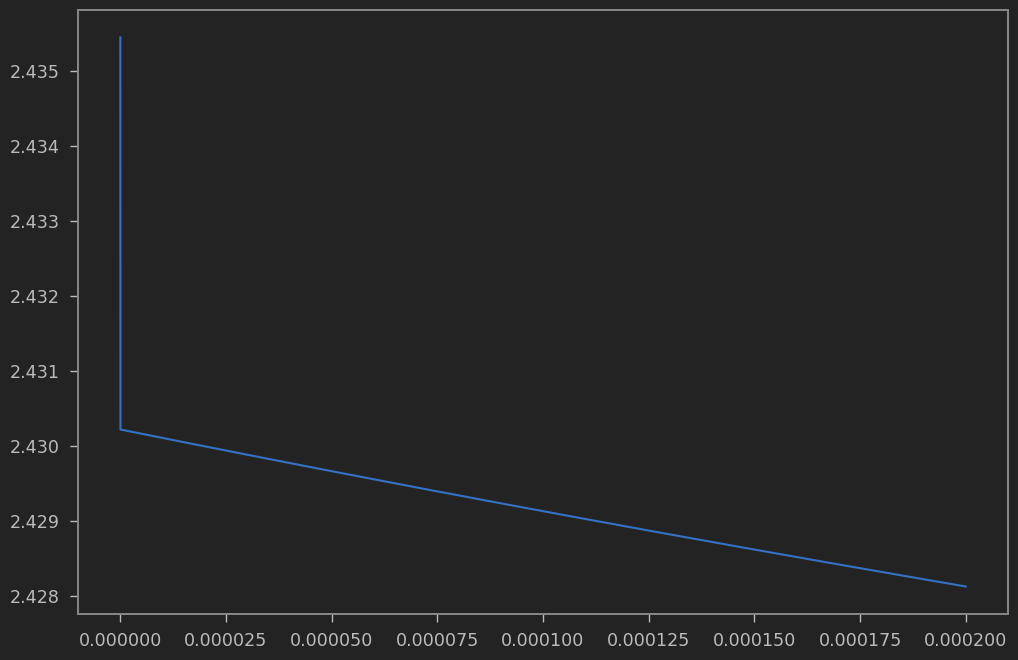

In [3]:
voltage = sim1.solution['Terminal voltage [V]'].entries
plt.plot(abs(current)*sim1.solution.t/3600,voltage)
notify

In [5]:
# extract initial conditon
S8_initial = sim1.solution['S8 [g]'].entries[-1]
#S6_initial = sim1.solution['S6 [g]'].entries[-1]
S4_initial = sim1.solution['S4 [g]'].entries[-1]
S2_initial = sim1.solution['S2 [g]'].entries[-1]
S_initial = sim1.solution['S [g]'].entries[-1]
Sp_initial = sim1.solution["Precipitated Sulfur [g]"].entries[-1]
V_initial = sim1.solution['Terminal voltage [V]'].entries[-1]

In [9]:
try:
    model = pybamm.lithium_sulfur.MarinescuEtAl2016()
    current = 2.3*.15#/5
    hours = 1
    time_in_seconds = 1000#hours*3600
    # (similar) parameters should be the same as in Marinescu et al. (2018)
    # However, the  initial condition from charge appears to be the result of a discharge
    params = model.default_parameter_values
    params.update(
        {
            "Current function [A]": current,
            "Initial Condition for S8 ion [g]": S8_initial,
            #"Initial Condition for S6 ion [g]": S6_initial,
            "Initial Condition for S4 ion [g]": S4_initial,
            "Initial Condition for S2 ion [g]": S2_initial,
            "Initial Condition for S ion [g]": S_initial,
            "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
            "Initial Condition for Terminal Voltage [V]": V_initial,
            
            #"Precipitation rate [s-1]": 1
        }
    )
    params.process_model(model)
    sim1 = pybamm.Simulation(
        model,
        parameter_values=params,
        solver=pybamm.CasadiSolver(
            atol=1e-6, 
            rtol=1e-3, 
            extra_options_setup={"max_step_size": 0.1}, 
            max_step_decrease_count = 15,
            #root_method = 'lm',
            #root_tol = 1e-7, 
            #dt_max = 1e-7
        ),
    )
    sim1.solve(np.linspace(0, time_in_seconds, 100))
except:
    notify

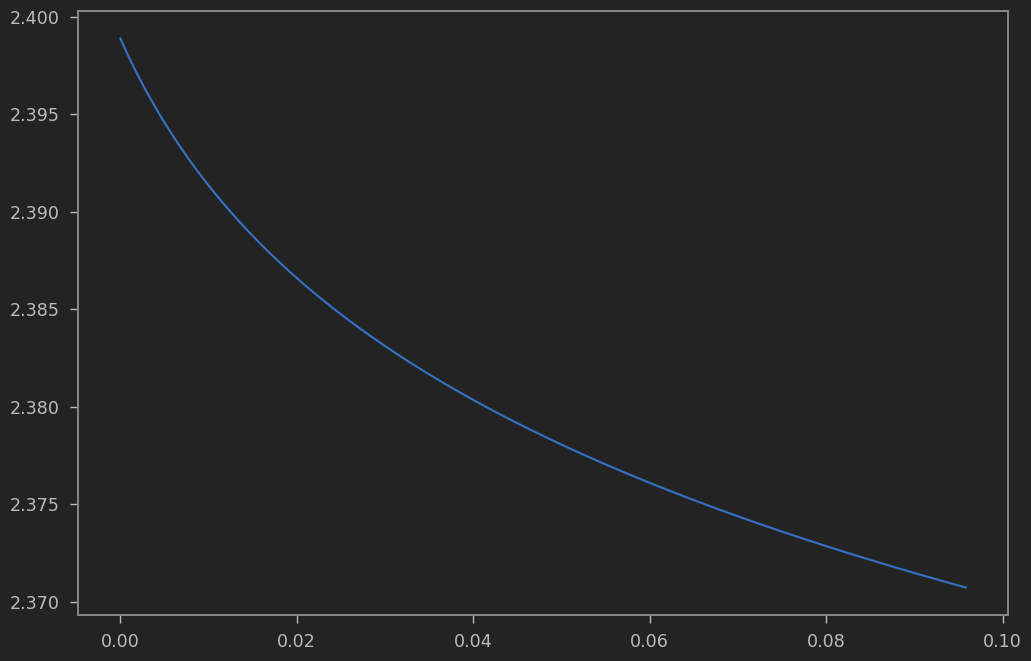

In [10]:
voltage = sim1.solution['Terminal voltage [V]'].entries
plt.plot(abs(current)*sim1.solution.t/3600,voltage)
notify

In [36]:
try:
    model = pybamm.lithium_sulfur.MarinescuEtAl2016()
    current = 2.3*.15
    hours = 10
    time_in_seconds = hours*3600
    # (similar) parameters should be the same as in Marinescu et al. (2018)
    # However, the  initial condition from charge appears to be the result of a discharge
    params = model.default_parameter_values
    params.update(
        {
            "Current function [A]": current,
            "Initial Condition for S8 ion [g]": S8_initial,
            #"Initial Condition for S6 ion [g]": S6_initial,
            "Initial Condition for S4 ion [g]": S4_initial,
            "Initial Condition for S2 ion [g]": S2_initial,
            "Initial Condition for S ion [g]": S_initial,
            "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
            "Initial Condition for Terminal Voltage [V]": V_initial,
            #"Precipitation rate [s-1]": 5,
            #"Shuttle rate coefficient during discharge [s-1]": 0.0002,
            "Lower voltage cut-off [V]": 2.1,
            "Standard Potential L [V]": 2.15,
            "Standard Potential H [V]": 2.38,
            #"S saturation mass [g]": 1e-5,
            #"Electrolyte volume per cell [L]": 0.0114*.25
        }
    )
    params.process_model(model)
    sim1 = pybamm.Simulation(
        model,
        parameter_values=params,
        solver=pybamm.CasadiSolver(
            atol=1e-6, 
            rtol=1e-3, 
            extra_options_setup={"max_step_size": 0.1}, 
            max_step_decrease_count = 15,
            #root_method = 'lm',
            #root_tol = 1e-7, 
            #dt_max = 1e-7
        ),
    )
    sim1.solve(np.linspace(0, time_in_seconds, 100))
except:
    notify

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

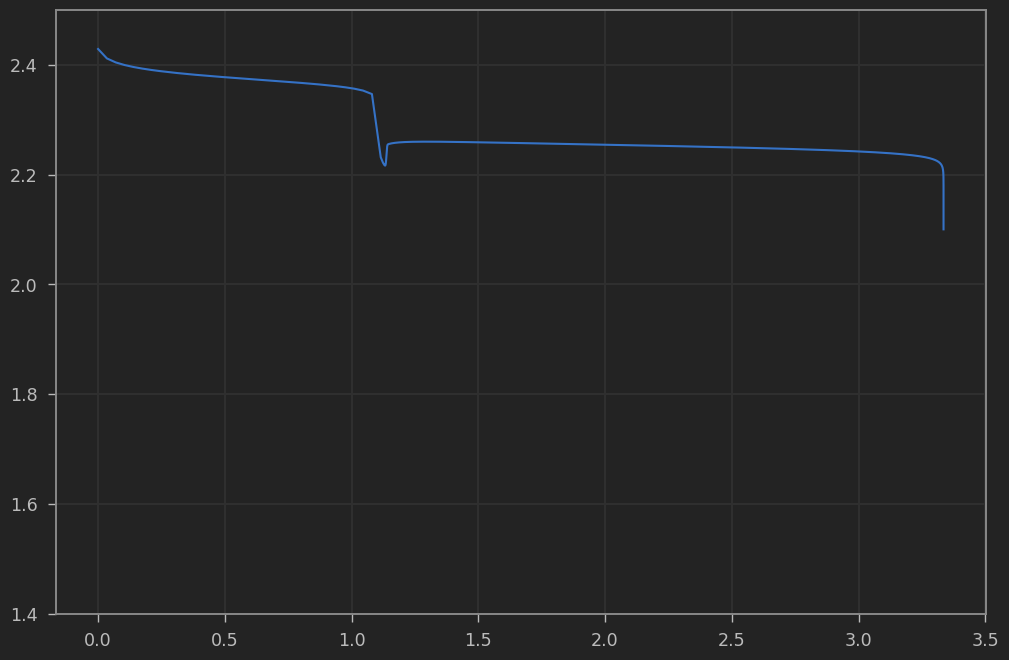

In [37]:
voltage = sim1.solution['Terminal voltage [V]'].entries
plt.plot(abs(current)*sim1.solution.t/3600,voltage)
plt.ylim([1.4,2.5])
plt.grid(True)
notify

In [38]:
Sp = sim1.solution['Precipitated Sulfur [g]'].entries
S8 = sim1.solution['S8 [g]'].entries
S4 = sim1.solution['S4 [g]'].entries
S2 = sim1.solution['S2 [g]'].entries
S1 = sim1.solution['S [g]'].entries

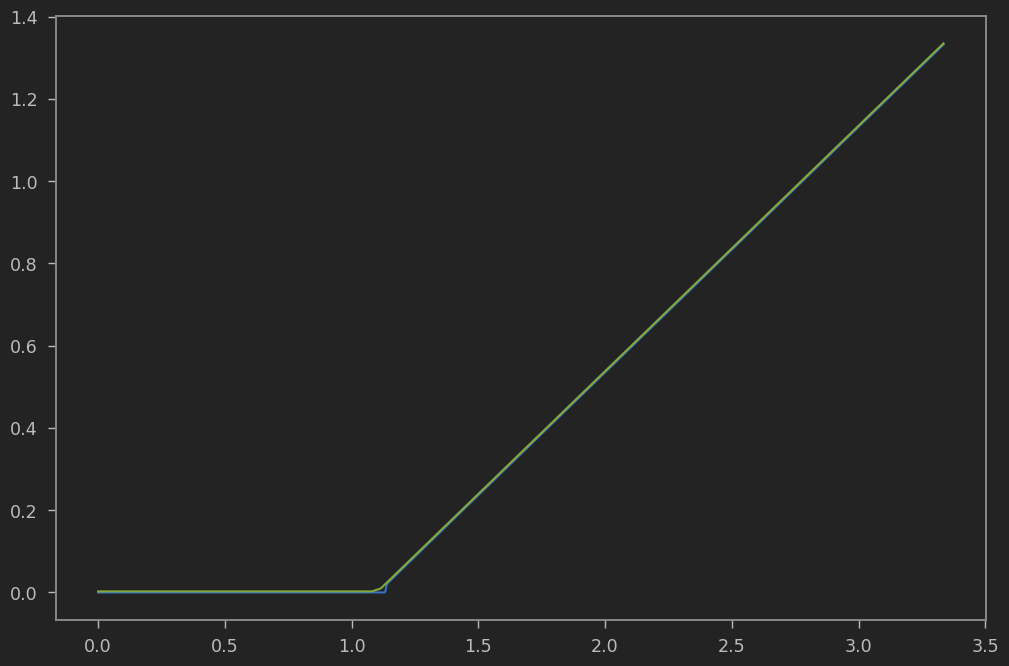

In [39]:
capacity = abs(current)*sim1.solution.t/3600
plt.plot(capacity, Sp)
#plt.plot(capacity, S8)
#plt.plot(capacity, S4)
plt.plot(capacity, S2)
#plt.plot(capacity, S1)

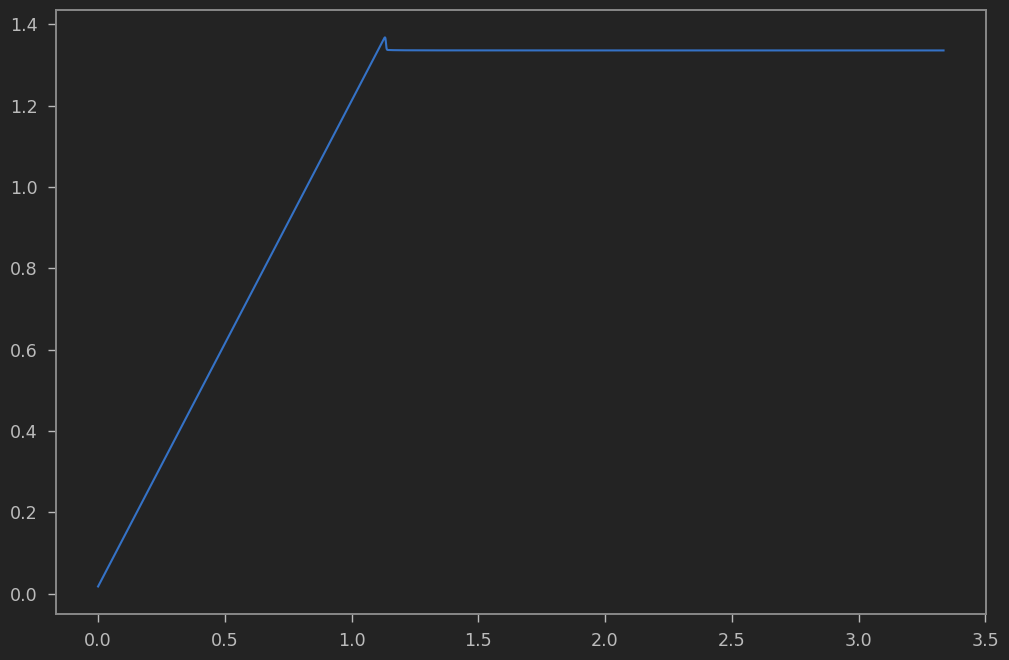

In [40]:
Li = 2*(S1 + 0.5*S2 + 0.25*S4)
plt.plot(capacity,Li)